### Import library 

!pip install tensorflow

In [19]:
############ Data Visualization ############
import matplotlib.pyplot as plt 
import seaborn as sns

############ Data analysis & calculation ############
import numpy as np
import pandas as pd
np.set_printoptions(precision=3, suppress=True)

############ Model building & Pre-Processing ############
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Normalization

### Import data 

In [20]:
raw_dataset = pd.read_csv(r"Auto.csv")

raw_dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1
394,44.0,4,97.0,52.0,2130,24.6,82,2
395,32.0,4,135.0,84.0,2295,11.6,82,1
396,28.0,4,120.0,79.0,2625,18.6,82,1


In [21]:
dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790,15.6,82,1
394,44.0,4,97.0,52.0,2130,24.6,82,2
395,32.0,4,135.0,84.0,2295,11.6,82,1
396,28.0,4,120.0,79.0,2625,18.6,82,1
397,31.0,4,119.0,82.0,2720,19.4,82,1


In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    int64  
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


### Missing Value

In [23]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [24]:
(6/398)*100    # > 40% delete column & <=5% data is very large then we are allowed to delete 

1.507537688442211

In [25]:
dataset = dataset.dropna()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           392 non-null    float64
 1   Cylinders     392 non-null    int64  
 2   Displacement  392 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        392 non-null    int64  
 5   Acceleration  392 non-null    float64
 6   Model Year    392 non-null    int64  
 7   Origin        392 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 27.6 KB


### Converting data to number

In [26]:
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790,15.6,82,USA
394,44.0,4,97.0,52.0,2130,24.6,82,Europe
395,32.0,4,135.0,84.0,2295,11.6,82,USA
396,28.0,4,120.0,79.0,2625,18.6,82,USA
397,31.0,4,119.0,82.0,2720,19.4,82,USA


In [27]:
dataset = pd.get_dummies(dataset, prefix='', prefix_sep='')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790,15.6,82,False,False,True
394,44.0,4,97.0,52.0,2130,24.6,82,True,False,False
395,32.0,4,135.0,84.0,2295,11.6,82,False,False,True
396,28.0,4,120.0,79.0,2625,18.6,82,False,False,True
397,31.0,4,119.0,82.0,2720,19.4,82,False,False,True


### Data Split train & Test

In [28]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

### Visulaization 

sns.pairplot(train_dataset[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde')

### Normalize the data 

In [29]:
X_train = train_dataset.copy()
X_test = test_dataset.copy()

In [30]:
X_train.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
146,28.0,4,90.0,75.0,2125,14.5,74,False,False,True
282,22.3,4,140.0,88.0,2890,17.3,79,False,False,True
69,12.0,8,350.0,160.0,4456,13.5,72,False,False,True
378,38.0,4,105.0,63.0,2125,14.7,82,False,False,True
331,33.8,4,97.0,67.0,2145,18.0,80,False,True,False


In [31]:
Y_train = X_train.pop('MPG')  # Dependent Variable ( Y)  
Y_test = X_test.pop('MPG')  

In [32]:
Y_train  # Dependent Variable ( Y)

146    28.0
282    22.3
69     12.0
378    38.0
331    33.8
       ... 
281    19.8
229    16.0
150    26.0
145    32.0
182    28.0
Name: MPG, Length: 314, dtype: float64

In [33]:
X_train.head() # independent Variable = X

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
146,4,90.0,75.0,2125,14.5,74,False,False,True
282,4,140.0,88.0,2890,17.3,79,False,False,True
69,8,350.0,160.0,4456,13.5,72,False,False,True
378,4,105.0,63.0,2125,14.7,82,False,False,True
331,4,97.0,67.0,2145,18.0,80,False,True,False


In [34]:
normalizer = Normalization()  # scaling or z-score or normally distibuted z = data-mean/standard deviation

In [35]:
normalizer.adapt(np.array(X_train))  ### convert to array then normalizing 

In [36]:
first = np.array(X_train[:1])

with np.printoptions(precision=2): # 2 decimal upto 
    print('First Original Row:', first)
    


First Original Row: [[4 90.0 75.0 2125 14.5 74 False False True]]


### Method 1 - Linear Model -- without Hidden Layer

* dense means layer and output means prediction and param =10 means = 9x and 1 bias

In [37]:
linear_model = keras.Sequential([normalizer,layers.Dense(units=1,activation="linear",use_bias=1)])  # unit 1 means = 1 nuerons
linear_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization) │ (314, 9)               │            19 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19 (80.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 19 (80.00 B)

* Learning rate = 0 to 1 

In [38]:
linear_model.compile(optimizer=tf.optimizers.SGD(learning_rate=0.1),loss='mean_absolute_error')

### Repetation of Process

* Train = 60% (251 ROW)  
* Validation = 20% of train ( 63 ROW) 
* Test = 20%

In [39]:
%%time
history = linear_model.fit(X_train, Y_train, 
    epochs=100, ## repetation 100
    validation_split = 0.2)  # Calculate validation results on 20% of the training data

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 23.1371 - val_loss: 23.0007
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.2896 - val_loss: 22.2128
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21.4630 - val_loss: 21.4244
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20.6623 - val_loss: 20.6377
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20.4608 - val_loss: 19.8507
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19.5325 - val_loss: 19.0635
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.9101 - val_loss: 18.2756
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.7234 - val_loss: 17.4886
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16.5041 - val_loss: 16.7018
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15.5356 - val_loss: 15.9135
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14.2336 - val_loss: 15.1268
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14.16

In [40]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.head()

,loss,val_loss,epoch
0,22.857218,23.000725,0
1,22.051159,22.212837,1
2,21.254398,21.424412,2
3,20.449379,20.637707,3
4,19.642200,19.850725,4


def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()
    plt.grid(True)
    return(plot_loss)

plot_loss(history)

In [41]:
train_results = {}
train_results['linear_model Without Hidden Layer']= linear_model.evaluate(X_train, Y_train, verbose=0)
train_results

{'linear_model Without Hidden Layer': 2.4736154079437256}

In [42]:
test_results = {}
test_results['linear_model Without Hidden Layer'] = linear_model.evaluate(X_test, Y_test, verbose=0)
test_results

{'linear_model Without Hidden Layer': 2.562692403793335}

In [43]:
train_full = pd.concat([X_train,Y_train],axis=1)
train_full.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA,MPG
146,4,90.0,75.0,2125,14.5,74,False,False,True,28.0
282,4,140.0,88.0,2890,17.3,79,False,False,True,22.3
69,8,350.0,160.0,4456,13.5,72,False,False,True,12.0
378,4,105.0,63.0,2125,14.7,82,False,False,True,38.0
331,4,97.0,67.0,2145,18.0,80,False,True,False,33.8


In [44]:
train_full["Prediction"]= np.round(linear_model.predict(X_train))
train_full.head()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA,MPG,Prediction
146,4,90.0,75.0,2125,14.5,74,False,False,True,28.0,26.0
282,4,140.0,88.0,2890,17.3,79,False,False,True,22.3,25.0
69,8,350.0,160.0,4456,13.5,72,False,False,True,12.0,13.0
378,4,105.0,63.0,2125,14.7,82,False,False,True,38.0,31.0
331,4,97.0,67.0,2145,18.0,80,False,True,False,33.8,32.0


### Method 2 - Linear Model --  Hidden Layer

* dense means layer and output means prediction and param =10 means = 9x and 1 bias

pip install tensorflow

In [45]:
from keras.models import Sequential
from keras.layers import Dense , Dropout

In [46]:
def build_and_compile_model(norm):
    model = keras.Sequential([norm,  # norm = dataset
      layers.Dense(64, activation='relu'),# hidden layer -1 with 64 nuerons &  relu = 0 & 1 
      layers.Dense(128, activation='relu'),# hidden layer -2 with 128 nuerons
      layers.Dense(1, activation='linear') # outer layer with 1-nuerons 
  ])

    model.compile(loss='mean_absolute_error',   # MAE 
                optimizer=tf.keras.optimizers.SGD(0.01)) # instead of Adam use SGB
    return model

# activation function = 'relu' or 'linear'

In [47]:
dnn_model = build_and_compile_model(normalizer)

dnn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization) │ (None, 9)              │            19 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19 (80.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 19 (80.00 B)

In [48]:
%%time
history = dnn_model.fit(X_train, Y_train,
    validation_split=0.2,
    verbose=1, epochs=100)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 22.7625 - val_loss: 22.3189
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21.5650 - val_loss: 21.4964
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20.8265 - val_loss: 20.3762
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19.5913 - val_loss: 18.7378
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18.2234 - val_loss: 16.1714
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15.0421 - val_loss: 12.8921
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.1102 - val_loss: 8.9935
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.7321 - val_loss: 5.4865
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.6702 - val_loss: 4.4543
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6726 - val_loss: 3.8638
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.1433 - val_loss: 3.2961
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7414 - val_l

plot_loss(history)

In [49]:
train_results

{'linear_model Without Hidden Layer': 2.4736154079437256}

In [50]:
train_results['Linear model With Hidden Layer'] = dnn_model.evaluate(X_train, Y_train, verbose=0)
train_results

{'linear_model Without Hidden Layer': 2.4736154079437256,
 'Linear model With Hidden Layer': 1.719938039779663}

In [51]:
test_results['Linear model With Hidden Layer'] = dnn_model.evaluate(X_test, Y_test, verbose=0)
test_results

{'linear_model Without Hidden Layer': 2.562692403793335,
 'Linear model With Hidden Layer': 1.7564462423324585}

# Prediction --Train Dataset

In [52]:
train_full2 = pd.concat([X_train,Y_train],axis=1)
train_full2.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA,MPG
146,4,90.0,75.0,2125,14.5,74,False,False,True,28.0
282,4,140.0,88.0,2890,17.3,79,False,False,True,22.3
69,8,350.0,160.0,4456,13.5,72,False,False,True,12.0
378,4,105.0,63.0,2125,14.7,82,False,False,True,38.0
331,4,97.0,67.0,2145,18.0,80,False,True,False,33.8


In [53]:
train_full2["Prediction"]=np.round(dnn_model.predict(X_train))
train_full2.head()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA,MPG,Prediction
146,4,90.0,75.0,2125,14.5,74,False,False,True,28.0,30.0
282,4,140.0,88.0,2890,17.3,79,False,False,True,22.3,25.0
69,8,350.0,160.0,4456,13.5,72,False,False,True,12.0,13.0
378,4,105.0,63.0,2125,14.7,82,False,False,True,38.0,37.0
331,4,97.0,67.0,2145,18.0,80,False,True,False,33.8,35.0


# Prediction --Test Dataset

In [54]:
test_full2 = pd.concat([X_test, Y_test],axis=1)
test_full2["Prediction"] = np.round(dnn_model.predict(X_test))
test_full2.head()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA,MPG,Prediction
9,8,390.0,190.0,3850,8.5,70,False,False,True,15.0,16.0
25,8,360.0,215.0,4615,14.0,70,False,False,True,10.0,12.0
28,8,304.0,193.0,4732,18.5,70,False,False,True,9.0,12.0
31,4,113.0,95.0,2228,14.0,71,False,True,False,25.0,25.0
33,6,232.0,100.0,2634,13.0,71,False,False,True,19.0,21.0


# Finished

# impact of below on MAE  -  Hyper Tuning Parameter

* Activation = Linear OR Relu
* Hidden layer = neuron
* Drop out
* Epoch
* Learning Rate
* Weight Optimizer  = SGB

# Model Comparision 

In [55]:
pd.DataFrame(train_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
linear_model Without Hidden Layer,2.473615
Linear model With Hidden Layer,1.719938


In [56]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
linear_model Without Hidden Layer,2.562692
Linear model With Hidden Layer,1.756446


## Model Saving

[*********************100%***********************]  1 of 1 completed

Epoch 1/10



/var/folders/y7/x828cmls6wn_rgpw52tqbb3h0000gn/T/ipykernel_2910/624582130.py:22: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Volume'] = data['Volume'].fillna(method='bfill')
/var/folders/y7/x828cmls6wn_rgpw52tqbb3h0000gn/T/ipykernel_2910/624582130.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill', inplace=True)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0406
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0032
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0023
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0019
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0018
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0018
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0019
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0016
Epoch 9/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0017
Epoch 10/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0015
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Mean Squared Error: 12333367.458727814


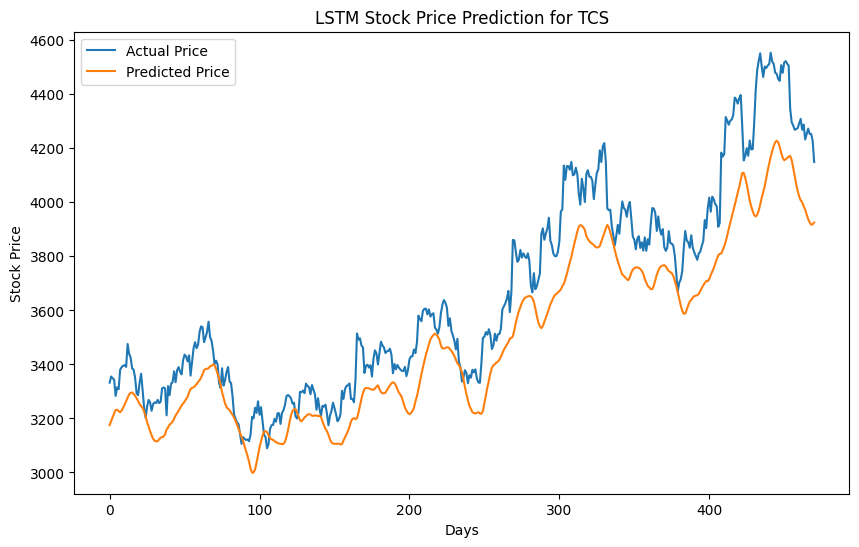

Next day's price movement: Down
Predicted percentage change: -5.40%
Final Capital: 105094.84545898439
Profit: 5094.84545898439


In [8]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error

# Fetch historical stock data (TCS example)
ticker = 'TCS.NS'
data = yf.download(ticker, start="2015-01-01", end="2024-10-15")

# Feature engineering: Moving Averages, RSI
data['MA50'] = data['Close'].rolling(window=50).mean()
data['MA200'] = data['Close'].rolling(window=200).mean()
data['RSI'] = 100 - (100 / (1 + (data['Close'].diff().apply(lambda x: max(x, 0)).rolling(window=14).mean() /
                                  data['Close'].diff().apply(lambda x: -min(x, 0)).rolling(window=14).mean())))

# Feature: Dividends, Volume

data['Volume'] = data['Volume'].fillna(method='bfill')

# Filling NaN values (from rolling)
data.fillna(method='bfill', inplace=True)

# Normalize the data for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['Close', 'MA50', 'MA200', 'RSI', 'Volume']])

# Create sequences (e.g., 60 days to predict the next day)
def create_sequences(data, step_size):
    X, y = [], []
    for i in range(len(data) - step_size - 1):
        X.append(data[i:(i + step_size), :])  # Sequence of 60 days
        y.append(data[i + step_size, 0])  # Next day’s close price
    return np.array(X), np.array(y)

# Set step size (e.g., using past 60 days)
step_size = 60
X, y = create_sequences(scaled_data, step_size)

# Split data into train and test sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Predict next day's closing price

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(np.concatenate((predictions, np.zeros((predictions.shape[0], scaled_data.shape[1] - 1))), axis=1))[:, 0]

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")


# Plot actual vs predicted prices
actual_prices = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], scaled_data.shape[1] - 1))), axis=1))[:, 0]

plt.figure(figsize=(10,6))
plt.plot(actual_prices, label="Actual Price")
plt.plot(predictions, label="Predicted Price")
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.title("LSTM Stock Price Prediction for TCS")
plt.legend()
plt.show()

# Predicting the price movement (Next day: High/Low and % change)
movement = np.where(predictions > actual_prices, 'Up', 'Down')
percentage_change = ((predictions - actual_prices) / actual_prices) * 100

# Display next day prediction
print(f"Next day's price movement: {movement[-1]}")
print(f"Predicted percentage change: {percentage_change[-1]:.2f}%")

# Simulating trading decisions based on LSTM predictions
initial_capital = 100000  # Starting capital in INR
position = 0  # Number of shares held
capital = initial_capital

# Simulate buying/selling based on predictions
for i in range(1, len(predictions)):
    if predictions[i] > actual_prices[i-1] and position == 0:
        # Buy if the prediction is higher than the previous day's actual price
        shares_to_buy = capital // actual_prices[i]
        capital -= shares_to_buy * actual_prices[i]
        position += shares_to_buy
    elif predictions[i] < actual_prices[i-1] and position > 0:
        # Sell if the prediction is lower
        capital += position * actual_prices[i]
        position = 0

# Calculate final capital after all trades
final_capital = capital + (position * actual_prices[-1])  # Sell remaining shares
profit = final_capital - initial_capital
print(f"Final Capital: {final_capital}")
print(f"Profit: {profit}")



In [10]:
pip install keras


You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
reloaded = tf.keras.models.load_model('Irfan_model')
test_results['reloaded'] = reloaded.evaluate(test_features, test_labels, verbose=0)

In [ ]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

In [11]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Early stopping and model checkpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_lstm_model.keras', save_best_only=True, monitor='val_loss')

# Train the model with callbacks
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test),
          callbacks=[early_stopping, model_checkpoint])


Epoch 1/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0339 - val_loss: 0.0032
Epoch 2/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0027 - val_loss: 0.0021
Epoch 3/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0021 - val_loss: 0.0014
Epoch 4/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0020 - val_loss: 9.8724e-04
Epoch 5/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0019 - val_loss: 0.0014
Epoch 6/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0019 - val_loss: 7.8506e-04
Epoch 7/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0017 - val_loss: 0.0011
Epoch 8/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0015 - val_loss: 6.9509e-04
Epoch 9/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0015 - val_loss: 7.9269e-04
Epoch 10/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0017 - val_loss: 0.0011
Epoch 11/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0015 - val_loss: 0.0031
Epoch 12/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/

In [12]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Fetch historical stock data (TCS example)
ticker = 'TCS.NS'
data = yf.download(ticker, start="2015-01-01", end="2024-10-15")

# Feature engineering: Moving Averages, RSI, MACD, Bollinger Bands
data['MA50'] = data['Close'].rolling(window=50).mean()
data['MA200'] = data['Close'].rolling(window=200).mean()

# RSI Calculation
data['RSI'] = 100 - (100 / (1 + (data['Close'].diff().apply(lambda x: max(x, 0)).rolling(window=14).mean() /
                                  data['Close'].diff().apply(lambda x: -min(x, 0)).rolling(window=14).mean())))

# MACD Calculation
data['EMA12'] = data['Close'].ewm(span=12, adjust=False).mean()
data['EMA26'] = data['Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = data['EMA12'] - data['EMA26']

# Bollinger Bands
data['Upper_BB'] = data['MA50'] + 2 * data['Close'].rolling(window=50).std()
data['Lower_BB'] = data['MA50'] - 2 * data['Close'].rolling(window=50).std()

# Feature: Volume
data['Volume'] = data['Volume'].fillna(method='bfill')

# Filling NaN values from rolling calculations
data.fillna(method='bfill', inplace=True)

# Normalize the data for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['Close', 'MA50', 'MA200', 'RSI', 'MACD', 'Upper_BB', 'Lower_BB', 'Volume']])

# Create sequences (e.g., 60 days to predict the next day)
def create_sequences(data, step_size):
    X, y = [], []
    for i in range(len(data) - step_size - 1):
        X.append(data[i:(i + step_size), :])  # Sequence of 60 days
        y.append(data[i + step_size, 0])  # Next day’s close price
    return np.array(X), np.array(y)

# Set step size (e.g., using past 60 days)
step_size = 60
X, y = create_sequences(scaled_data, step_size)

# Split data into train and test sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Predict next day's closing price

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping and model checkpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_lstm_model.h5', save_best_only=True, monitor='val_loss')

# Train the model with callbacks
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test),
          callbacks=[early_stopping, model_checkpoint])

# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(np.concatenate((predictions, np.zeros((predictions.shape[0], scaled_data.shape[1] - 1))), axis=1))[:, 0]

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")

# Plot actual vs predicted prices
actual_prices = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], scaled_data.shape[1] - 1))), axis=1))[:, 0]

plt.figure(figsize=(10,6))
plt.plot(actual_prices, label="Actual Price")
plt.plot(predictions, label="Predicted Price")
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.title("LSTM Stock Price Prediction for TCS")
plt.legend()
plt.show()

# Predicting the price movement (Next day: High/Low and % change)
movement = np.where(predictions > actual_prices, 'Up', 'Down')
percentage_change = ((predictions - actual_prices) / actual_prices) * 100

# Display next day prediction
print(f"Next day's price movement: {movement[-1]}")
print(f"Predicted percentage change: {percentage_change[-1]:.2f}%")

# Simulating trading decisions based on LSTM predictions
initial_capital = 100000  # Starting capital in INR
position = 0  # Number of shares held
capital = initial_capital

# Simulate buying/selling based on predictions
for i in range(1, len(predictions)):
    if predictions[i] > actual_prices[i-1] and position == 0:
        # Buy if the prediction is higher than the previous day's actual price
        shares_to_buy = capital // actual_prices[i]
        capital -= shares_to_buy * actual_prices[i]
        position += shares_to_buy
    elif predictions[i] < actual_prices[i-1] and position > 0:
        # Sell if the prediction is lower
        capital += position * actual_prices[i]
        position = 0

# Calculate final capital after all trades
final_capital = capital + (position * actual_prices[-1])  # Sell remaining shares
profit = final_capital - initial_capital
print(f"Final Capital: {final_capital}")
print(f"Profit: {profit}")

# Predict the next day price based on the most recent 60-day data
def predict_next_day(data, model, scaler, step_size):
    last_sequence = data[-step_size:].reshape(1, step_size, data.shape[1])
    predicted_price = model.predict(last_sequence)
    predicted_price = scaler.inverse_transform(np.concatenate((predicted_price, np.zeros((predicted_price.shape[0], data.shape[1] - 1))), axis=1))[:, 0]
    return predicted_price[0]

next_day_price = predict_next_day(scaled_data, model, scaler, step_size)
print(f"Predicted Next Day Price: {next_day_price}")


[*********************100%***********************]  1 of 1 completed
/var/folders/y7/x828cmls6wn_rgpw52tqbb3h0000gn/T/ipykernel_2910/2499676426.py:33: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Volume'] = data['Volume'].fillna(method='bfill')
/var/folders/y7/x828cmls6wn_rgpw52tqbb3h0000gn/T/ipykernel_2910/2499676426.py:36: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill', inplace=True)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


ValueError: The filepath provided must end in `.keras` (Keras model format). Received: filepath=best_lstm_model.h5

[*********************100%***********************]  1 of 1 completed

Epoch 1/50



/var/folders/y7/x828cmls6wn_rgpw52tqbb3h0000gn/T/ipykernel_2910/4127331756.py:22: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Volume'] = data['Volume'].fillna(method='bfill')
/var/folders/y7/x828cmls6wn_rgpw52tqbb3h0000gn/T/ipykernel_2910/4127331756.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill', inplace=True)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0533 - val_loss: 0.0028
Epoch 2/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0035 - val_loss: 0.0052
Epoch 3/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0024 - val_loss: 0.0042
Epoch 4/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0021 - val_loss: 9.8754e-04
Epoch 5/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0019 - val_loss: 8.9196e-04
Epoch 6/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0016 - val_loss: 8.4762e-04
Epoch 7/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0018 - val_loss: 0.0016
Epoch 8/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 9/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 10/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0015 - val_loss: 0.0039
Epoch 11/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0019 - val_loss: 0.0014
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Mean Squared Error: 13

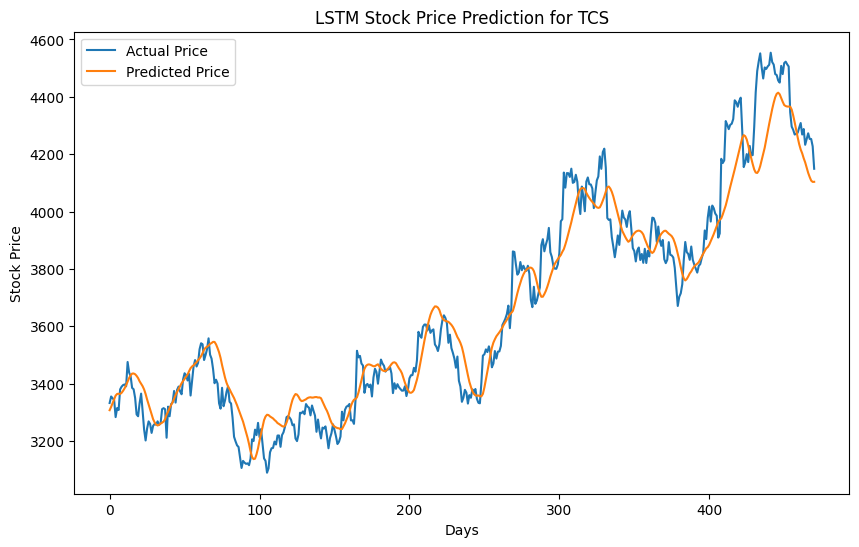

Next day's price movement: Down
Predicted percentage change: -1.10%
Final Capital: 150393.56030273446
Profit: 50393.56030273446


In [13]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Fetch historical stock data (TCS example)
ticker = 'TCS.NS'
data = yf.download(ticker, start="2015-01-01", end="2024-10-15")

# Feature engineering: Moving Averages, RSI
data['MA50'] = data['Close'].rolling(window=50).mean()
data['MA200'] = data['Close'].rolling(window=200).mean()
data['RSI'] = 100 - (100 / (1 + (data['Close'].diff().apply(lambda x: max(x, 0)).rolling(window=14).mean() /
                                  data['Close'].diff().apply(lambda x: -min(x, 0)).rolling(window=14).mean())))

# Feature: Volume (Dividends are not available in yfinance for most Indian stocks)
data['Volume'] = data['Volume'].fillna(method='bfill')

# Filling NaN values from rolling calculations
data.fillna(method='bfill', inplace=True)

# Normalize the data for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['Close', 'MA50', 'MA200', 'RSI', 'Volume']])

# Create sequences (e.g., 60 days to predict the next day)
def create_sequences(data, step_size):
    X, y = [], []
    for i in range(len(data) - step_size - 1):
        X.append(data[i:(i + step_size), :])  # Sequence of 60 days
        y.append(data[i + step_size, 0])  # Next day’s close price
    return np.array(X), np.array(y)

# Set step size (e.g., using past 60 days)
step_size = 60
X, y = create_sequences(scaled_data, step_size)

# Split data into train and test sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Predict next day's closing price

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping and model checkpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_lstm_model.keras', save_best_only=True, monitor='val_loss')

# Train the model with callbacks
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test),
          callbacks=[early_stopping, model_checkpoint])

# Load the best model (if you want to use it later for predictions)
# from tensorflow.keras.models import load_model
# model = load_model('best_lstm_model.keras')

# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(np.concatenate((predictions, np.zeros((predictions.shape[0], scaled_data.shape[1] - 1))), axis=1))[:, 0]

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

# Plot actual vs predicted prices
actual_prices = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], scaled_data.shape[1] - 1))), axis=1))[:, 0]

plt.figure(figsize=(10,6))
plt.plot(actual_prices, label="Actual Price")
plt.plot(predictions, label="Predicted Price")
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.title("LSTM Stock Price Prediction for TCS")
plt.legend()
plt.show()

# Predicting the price movement (Next day: High/Low and % change)
movement = np.where(predictions > actual_prices, 'Up', 'Down')
percentage_change = ((predictions - actual_prices) / actual_prices) * 100

# Display next day prediction
print(f"Next day's price movement: {movement[-1]}")
print(f"Predicted percentage change: {percentage_change[-1]:.2f}%")

# Simulating trading decisions based on LSTM predictions
initial_capital = 100000  # Starting capital in INR
position = 0  # Number of shares held
capital = initial_capital

# Simulate buying/selling based on predictions
for i in range(1, len(predictions)):
    if predictions[i] > actual_prices[i-1] and position == 0:
        # Buy if the prediction is higher than the previous day's actual price
        shares_to_buy = capital // actual_prices[i]
        capital -= shares_to_buy * actual_prices[i]
        position += shares_to_buy
    elif predictions[i] < actual_prices[i-1] and position > 0:
        # Sell if the prediction is lower
        capital += position * actual_prices[i]
        position = 0

# Calculate final capital after all trades
final_capital = capital + (position * actual_prices[-1])  # Sell remaining shares
profit = final_capital - initial_capital
print(f"Final Capital: {final_capital}")
print(f"Profit: {profit}")


In [17]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Fetch historical stock data (TCS example)
ticker = 'TCS.NS'
data = yf.download(ticker, start="2015-01-01", end="2024-10-15")

# Feature engineering: Moving Averages, RSI, MACD, Bollinger Bands
data['MA50'] = data['Close'].rolling(window=50).mean()
data['MA200'] = data['Close'].rolling(window=200).mean()

# RSI Calculation
data['RSI'] = 100 - (100 / (1 + (data['Close'].diff().apply(lambda x: max(x, 0)).rolling(window=14).mean() /
                                  data['Close'].diff().apply(lambda x: -min(x, 0)).rolling(window=14).mean())))

# MACD Calculation
data['EMA12'] = data['Close'].ewm(span=12, adjust=False).mean()
data['EMA26'] = data['Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = data['EMA12'] - data['EMA26']

# Bollinger Bands
data['Upper_BB'] = data['MA50'] + 2 * data['Close'].rolling(window=50).std()
data['Lower_BB'] = data['MA50'] - 2 * data['Close'].rolling(window=50).std()

# Feature: Volume
data['Volume'] = data['Volume'].fillna(method='bfill')

# Filling NaN values from rolling calculations
data.fillna(method='bfill', inplace=True)

# Normalize the data for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['Close', 'MA50', 'MA200', 'RSI', 'MACD', 'Upper_BB', 'Lower_BB', 'Volume']])

# Create sequences (e.g., 60 days to predict the next day)
def create_sequences(data, step_size):
    X, y = [], []
    for i in range(len(data) - step_size - 1):
        X.append(data[i:(i + step_size), :])  # Sequence of 60 days
        y.append(data[i + step_size, 0])  # Next day’s close price
    return np.array(X), np.array(y)

# Set step size (e.g., using past 60 days)
step_size = 60
X, y = create_sequences(scaled_data, step_size)

# Split data into train and test sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Predict next day's closing price

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping and model checkpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_lstm_model.keras', save_best_only=True, monitor='val_loss', mode='min', verbose=1)

# Train the model with callbacks
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test),
          callbacks=[early_stopping, model_checkpoint])

# Make predictions
predictions = model.predict(X_test)
predictions = np.zeros((predictions.shape[0], scaled_data.shape[1]))
predictions[:, 0] = predictions
predictions = scaler.inverse_transform(predictions)[:, 0]

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")

# Plot actual vs predicted prices
actual_prices = scaler.inverse_transform(np.zeros((y_test.shape[0], scaled_data.shape[1])))
actual_prices[:, 0] = y_test
actual_prices = actual_prices[:, 0]

plt.figure(figsize=(10,6))
plt.plot(actual_prices, label="Actual Price")
plt.plot(predictions, label="Predicted Price")
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.title("LSTM Stock Price Prediction for TCS")
plt.legend()
plt.show()

# Predicting the price movement (Next day: High/Low and % change)
movement = np.where(predictions > actual_prices, 'Up', 'Down')
percentage_change = ((predictions - actual_prices) / actual_prices) * 100

# Display next day prediction
print(f"Next day's price movement: {movement[-1]}")
print(f"Predicted percentage change: {percentage_change[-1]:.2f}%")

# Simulating trading decisions based on LSTM predictions
initial_capital = 100000  # Starting capital in INR
position = 0  # Number of shares held
capital = initial_capital

# Simulate buying/selling based on predictions
for i in range(1, len(predictions)):
    if predictions[i] > actual_prices[i-1] and position == 0:
        # Buy if the prediction is higher than the previous day's actual price
        shares_to_buy = capital // actual_prices[i]
        capital -= shares_to_buy * actual_prices[i]
        position += shares_to_buy
    elif predictions[i] < actual_prices[i-1] and position > 0:
        # Sell if the prediction is lower
        capital += position * actual_prices[i]
        position = 0

# Calculate final capital after all trades
final_capital = capital + (position * actual_prices[-1])  # Sell remaining shares
profit = final_capital - initial_capital
print(f"Final Capital: {final_capital}")
print(f"Profit: {profit}")

# Predict the next day price based on the most recent 60-day data
def predict_next_day(data, model, scaler, step_size):
    last_sequence = data[-step_size:].reshape(1, step_size, data.shape[1])
    predicted_price = model.predict(last_sequence)
    predictions = np.zeros((predicted_price.shape[0], scaled_data.shape[1]))
    predictions[:, 0] = predicted_price
    predicted_price = scaler.inverse_transform(predictions)[:, 0]
    return predicted_price[0]

next_day_price = predict_next_day(scaled_data, model, scaler, step_size)
print(f"Predicted Next Day Price: {next_day_price}")

[*********************100%***********************]  1 of 1 completed

Epoch 1/50



/var/folders/y7/x828cmls6wn_rgpw52tqbb3h0000gn/T/ipykernel_2910/1805607770.py:33: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Volume'] = data['Volume'].fillna(method='bfill')
/var/folders/y7/x828cmls6wn_rgpw52tqbb3h0000gn/T/ipykernel_2910/1805607770.py:36: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill', inplace=True)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


58/59 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0256
Epoch 1: val_loss improved from inf to 0.00225, saving model to best_lstm_model.keras
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0251 - val_loss: 0.0023
Epoch 2/50
58/59 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0028
Epoch 2: val_loss did not improve from 0.00225
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0028 - val_loss: 0.0036
Epoch 3/50
58/59 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0027
Epoch 3: val_loss improved from 0.00225 to 0.00097, saving model to best_lstm_model.keras
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0027 - val_loss: 9.6548e-04
Epoch 4/50
58/59 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0021
Epoch 4: val_loss did not improve from 0.00097
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0021 - val_loss: 0.0028
Epoch 5/50
58/59 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0024
Epoch 5: val_loss improved from 0.00097 to 0.00087, saving model to best_lstm_model.keras
59/59 ━━━━━━━━━━━━━━━

ValueError: could not broadcast input array from shape (471,8) into shape (471,)

[*********************100%***********************]  1 of 1 completed

Epoch 1/50



/var/folders/y7/x828cmls6wn_rgpw52tqbb3h0000gn/T/ipykernel_37183/2394001600.py:33: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Volume'] = data['Volume'].fillna(method='bfill')
/var/folders/y7/x828cmls6wn_rgpw52tqbb3h0000gn/T/ipykernel_37183/2394001600.py:36: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill', inplace=True)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0394 - val_loss: 0.0031
Epoch 2/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0038 - val_loss: 0.0017
Epoch 3/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0025 - val_loss: 7.7317e-04
Epoch 4/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0021 - val_loss: 0.0011
Epoch 5/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0018 - val_loss: 8.1800e-04
Epoch 6/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0018 - val_loss: 8.9295e-04
Epoch 7/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0016 - val_loss: 0.0040
Epoch 8/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0018 - val_loss: 0.0015
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Mean Squared Error: 13656112.30910195
Mean Absolute Error: 3679.0106716394953
R² Score: -1125292452.2503068


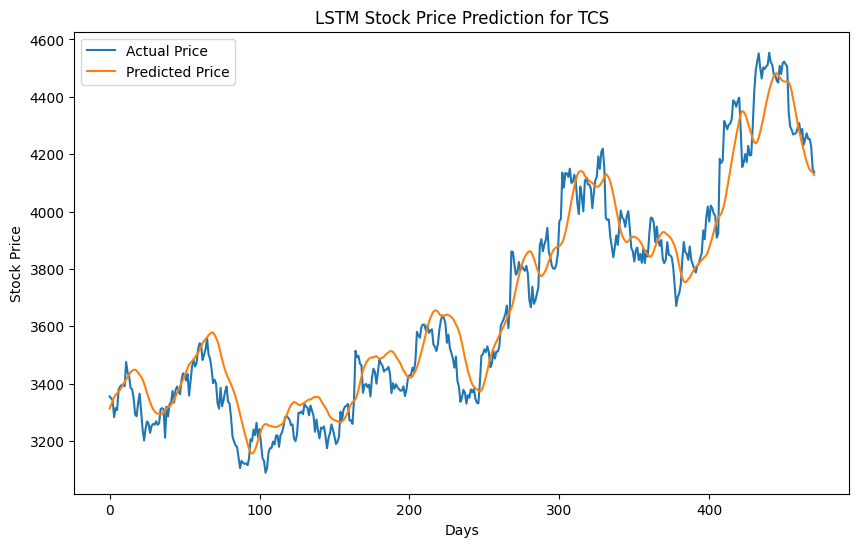

Next day's price movement: Down
Predicted percentage change: -0.22%
Final Capital: 151609.62890625
Profit: 51609.62890625
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted Next Day Price: 4104.939063988495


In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Fetch historical stock data (TCS example)
ticker = 'TCS.NS'
data = yf.download(ticker, start="2015-01-01", end="2024-10-16")

# Feature engineering: Moving Averages, RSI, MACD, Bollinger Bands
data['MA50'] = data['Close'].rolling(window=50).mean()
data['MA200'] = data['Close'].rolling(window=200).mean()

# RSI Calculation
data['RSI'] = 100 - (100 / (1 + (data['Close'].diff().apply(lambda x: max(x, 0)).rolling(window=14).mean() /
                                  data['Close'].diff().apply(lambda x: -min(x, 0)).rolling(window=14).mean())))

# MACD Calculation
data['EMA12'] = data['Close'].ewm(span=12, adjust=False).mean()
data['EMA26'] = data['Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = data['EMA12'] - data['EMA26']

# Bollinger Bands
data['Upper_BB'] = data['MA50'] + 2 * data['Close'].rolling(window=50).std()
data['Lower_BB'] = data['MA50'] - 2 * data['Close'].rolling(window=50).std()

# Feature: Volume
data['Volume'] = data['Volume'].fillna(method='bfill')

# Filling NaN values from rolling calculations
data.fillna(method='bfill', inplace=True)

# Normalize the data for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['Close', 'MA50', 'MA200', 'RSI', 'MACD', 'Upper_BB', 'Lower_BB', 'Volume']])

# Create sequences (e.g., 60 days to predict the next day)
def create_sequences(data, step_size):
    X, y = [], []
    for i in range(len(data) - step_size - 1):
        X.append(data[i:(i + step_size), :])  # Sequence of 60 days
        y.append(data[i + step_size, 0])  # Next day’s close price
    return np.array(X), np.array(y)

# Set step size (e.g., using past 60 days)
step_size = 60
X, y = create_sequences(scaled_data, step_size)

# Split data into train and test sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Predict next day's closing price

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping and model checkpoint (Updated to save as .keras)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_lstm_model.keras', save_best_only=True, monitor='val_loss')

# Train the model with callbacks
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test),
          callbacks=[early_stopping, model_checkpoint])

# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(np.concatenate((predictions, np.zeros((predictions.shape[0], scaled_data.shape[1] - 1))), axis=1))[:, 0]

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")

# Plot actual vs predicted prices
actual_prices = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], scaled_data.shape[1] - 1))), axis=1))[:, 0]

plt.figure(figsize=(10,6))
plt.plot(actual_prices, label="Actual Price")
plt.plot(predictions, label="Predicted Price")
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.title("LSTM Stock Price Prediction for TCS")
plt.legend()
plt.show()

# Predicting the price movement (Next day: High/Low and % change)
movement = np.where(predictions > actual_prices, 'Up', 'Down')
percentage_change = ((predictions - actual_prices) / actual_prices) * 100

# Display next day prediction
print(f"Next day's price movement: {movement[-1]}")
print(f"Predicted percentage change: {percentage_change[-1]:.2f}%")

# Simulating trading decisions based on LSTM predictions
initial_capital = 100000  # Starting capital in INR
position = 0  # Number of shares held
capital = initial_capital

# Simulate buying/selling based on predictions
for i in range(1, len(predictions)):
    if predictions[i] > actual_prices[i-1] and position == 0:
        # Buy if the prediction is higher than the previous day's actual price
        shares_to_buy = capital // actual_prices[i]
        capital -= shares_to_buy * actual_prices[i]
        position += shares_to_buy
    elif predictions[i] < actual_prices[i-1] and position > 0:
        # Sell if the prediction is lower
        capital += position * actual_prices[i]
        position = 0

# Calculate final capital after all trades
final_capital = capital + (position * actual_prices[-1])  # Sell remaining shares
profit = final_capital - initial_capital
print(f"Final Capital: {final_capital}")
print(f"Profit: {profit}")

# Predict the next day price based on the most recent 60-day data
def predict_next_day(data, model, scaler, step_size):
    last_sequence = data[-step_size:].reshape(1, step_size, data.shape[1])
    predicted_price = model.predict(last_sequence)
    predicted_price = scaler.inverse_transform(np.concatenate((predicted_price, np.zeros((predicted_price.shape[0], data.shape[1] - 1))), axis=1))[:, 0]
    return predicted_price[0]

next_day_price = predict_next_day(scaled_data, model, scaler, step_size)
print(f"Predicted Next Day Price: {next_day_price}")


In [2]:
data

,Open,High,Low,Close,Adj Close,Volume,MA50,MA200,RSI,EMA12,EMA26,MACD,Upper_BB,Lower_BB
Date,,,,,,,,,,,,,,
2015-01-01,55.458332,56.474998,55.125000,56.075001,30.368467,2369712,55.890333,62.120791,40.909064,56.075001,56.075001,0.000000,59.191660,52.589006
2015-01-02,56.325001,56.575001,55.625000,55.766666,30.201490,2576334,55.890333,62.120791,40.909064,56.027565,56.052161,-0.024596,59.191660,52.589006
2015-01-05,55.891666,56.983334,55.650002,56.366665,30.526428,3609636,55.890333,62.120791,40.909064,56.079734,56.075458,0.004276,59.191660,52.589006
2015-01-06,56.583332,56.775002,55.283333,55.741665,30.187943,6695466,55.890333,62.120791,40.909064,56.027723,56.050732,-0.023009,59.191660,52.589006
2015-01-07,55.683334,56.266666,54.933334,55.841667,30.242105,5033676,55.890333,62.120791,40.909064,55.999099,56.035246,-0.036147,59.191660,52.589006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-09,167.789993,169.240005,164.460007,164.740005,164.740005,20278252,172.477999,164.865950,45.127405,169.430204,170.987898,-1.557694,182.693134,162.262865
2024-10-10,165.169998,167.199997,164.009995,164.389999,164.389999,10145184,172.106799,165.068900,49.071702,168.654788,170.499165,-1.844377,182.115524,162.098075
2024-10-11,164.389999,164.740005,162.600006,163.149994,163.149994,8750905,171.736399,165.262900,44.304889,167.807896,169.954782,-2.146886,181.671077,161.801722
